<a href="https://colab.research.google.com/github/anushChrist/ML_LAB/blob/main/2348504_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

Each row corresponds to the item bought by one customer in one invoice.

In [4]:
df = pd.read_csv("/content/Market_Basket_Optimisation.csv")
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
items = df["shrimp"].unique()
items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['burgers', 'chutney', 'turkey', 'mineral water', 'low fat yogurt',
       'whole wheat pasta', 'soup', 'frozen vegetables', 'french fries',
       'eggs', 'cookies', 'spaghetti', 'shrimp', 'meatballs', 'red wine',
       'rice', 'parmesan cheese', 'ground beef', 'sparkling water',
       'herb & pepper', 'pickles', 'energy bar', 'fresh tuna', 'escalope',
       'avocado', 'tomato sauce', 'clothes accessories', 'energy drink',
       'chocolate', 'grated cheese', 'yogurt cake', 'mint', 'asparagus',
       'champagne', 'ham', 'muffins', 'french wine', 'chicken', 'pasta',
       'tomatoes', 'pancakes', 'frozen smoothie', 'carrots', 'yams',
       'shallot', 'butter', 'light mayo', 'pepper', 'candy bars',
       'cooking oil', 'milk', 'green tea', 'bug spray', 'oil',
       'olive oil', 'salmon', 'cake', 'almonds', 'salt', 'strong cheese',
       'hot dogs', 'pet food', 'whole wheat rice', 'antioxydant juice',
       'honey', 'sandwich', 'salad', 'magazines', 'protein bar',
       '

Column names are just item names so Rename columns cuz why not!

In [6]:
new_columns = [f'Column {i}' for i in range(1, len(df.columns) + 1)]
df.columns = new_columns
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18,Column 19,Column 20
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Generate a list of all the transactions.

In [7]:
transactions=[]
for index,row in df.iterrows():
  transactions.append(row.dropna().tolist())
transactions[:15]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water']]

Transform the Transactions list into binary matrix format and store it in a dataframe

In [23]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_table = pd.DataFrame(te_ary, columns=te.columns_)
transaction_table.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Use Apriori Algorithm to generate all the Frequent occuring item sets.

In [9]:
frequent_itemsets = apriori(transaction_table, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.020267,(almonds),1
1,0.033200,(avocado),1
2,0.010800,(barbecue sauce),1
3,0.014267,(black tea),1
4,0.011467,(body spray),1
...,...,...,...
254,0.011067,"(ground beef, milk, mineral water)",3
255,0.017067,"(ground beef, mineral water, spaghetti)",3
256,0.015733,"(milk, mineral water, spaghetti)",3
257,0.010267,"(olive oil, mineral water, spaghetti)",3


Cheking for the most occuring/ popular items.

In [10]:
popular_items = frequent_itemsets[frequent_itemsets['length'] == 1].sort_values(by = 'support', ascending = False).head(15)
popular_items.drop("length", axis = 1).sort_values(by = 'support', ascending = False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
46,0.238267,(mineral water)
19,0.179733,(eggs)
63,0.174133,(spaghetti)
24,0.170933,(french fries)
13,0.163867,(chocolate)
32,0.132000,(green tea)
45,0.129600,(milk)
33,0.098267,(ground beef)
30,0.095333,(frozen vegetables)
53,0.095067,(pancakes)


This shows Top 10 most bought items.

Visualizing using Bar Graph

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


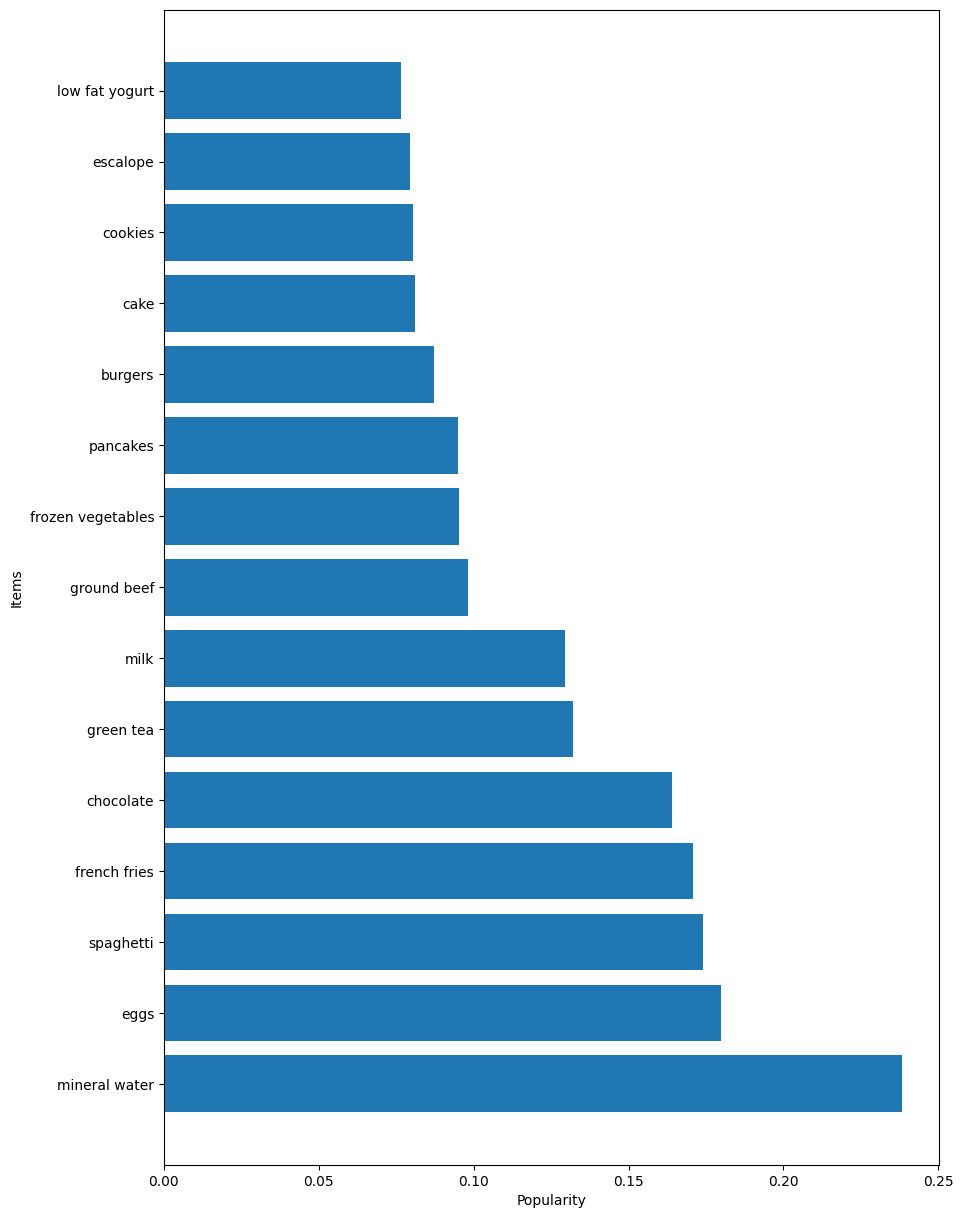

In [11]:
plt.figure(figsize=(10, 15))
labels = popular_items['itemsets'].apply(lambda itemset: ', '.join(itemset))
support_values = popular_items['support'].values
plt.barh(labels, support_values)
plt.xlabel('Popularity')
plt.ylabel('Items')
plt.show()

Pie Chart

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


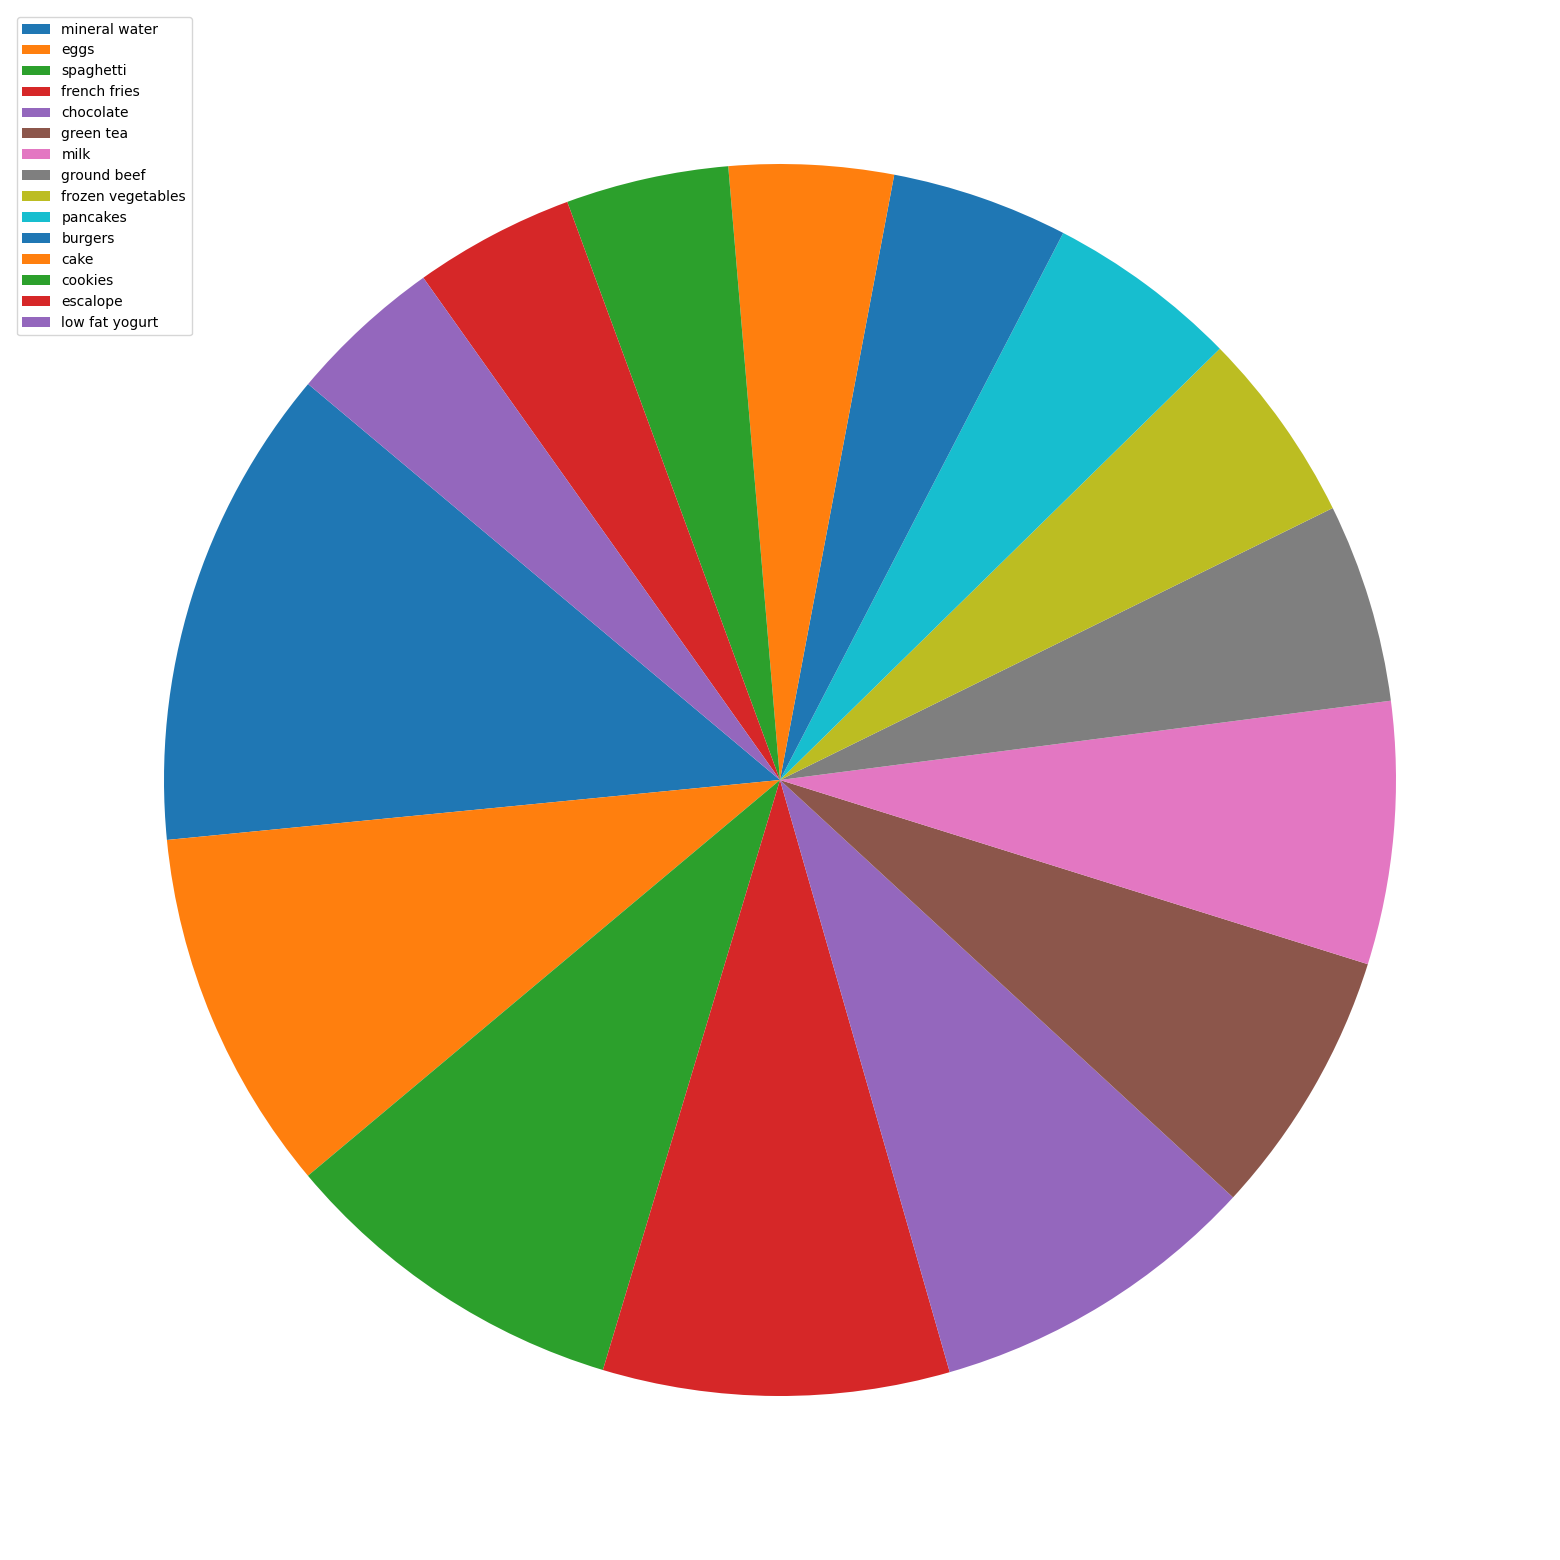

In [12]:
total_support = sum(support_values)
percentages = [(support / total_support) * 100 for support in support_values]
plt.figure(figsize=(20, 20))
plt.pie(percentages, startangle=140)
plt.legend(labels, loc='upper left')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


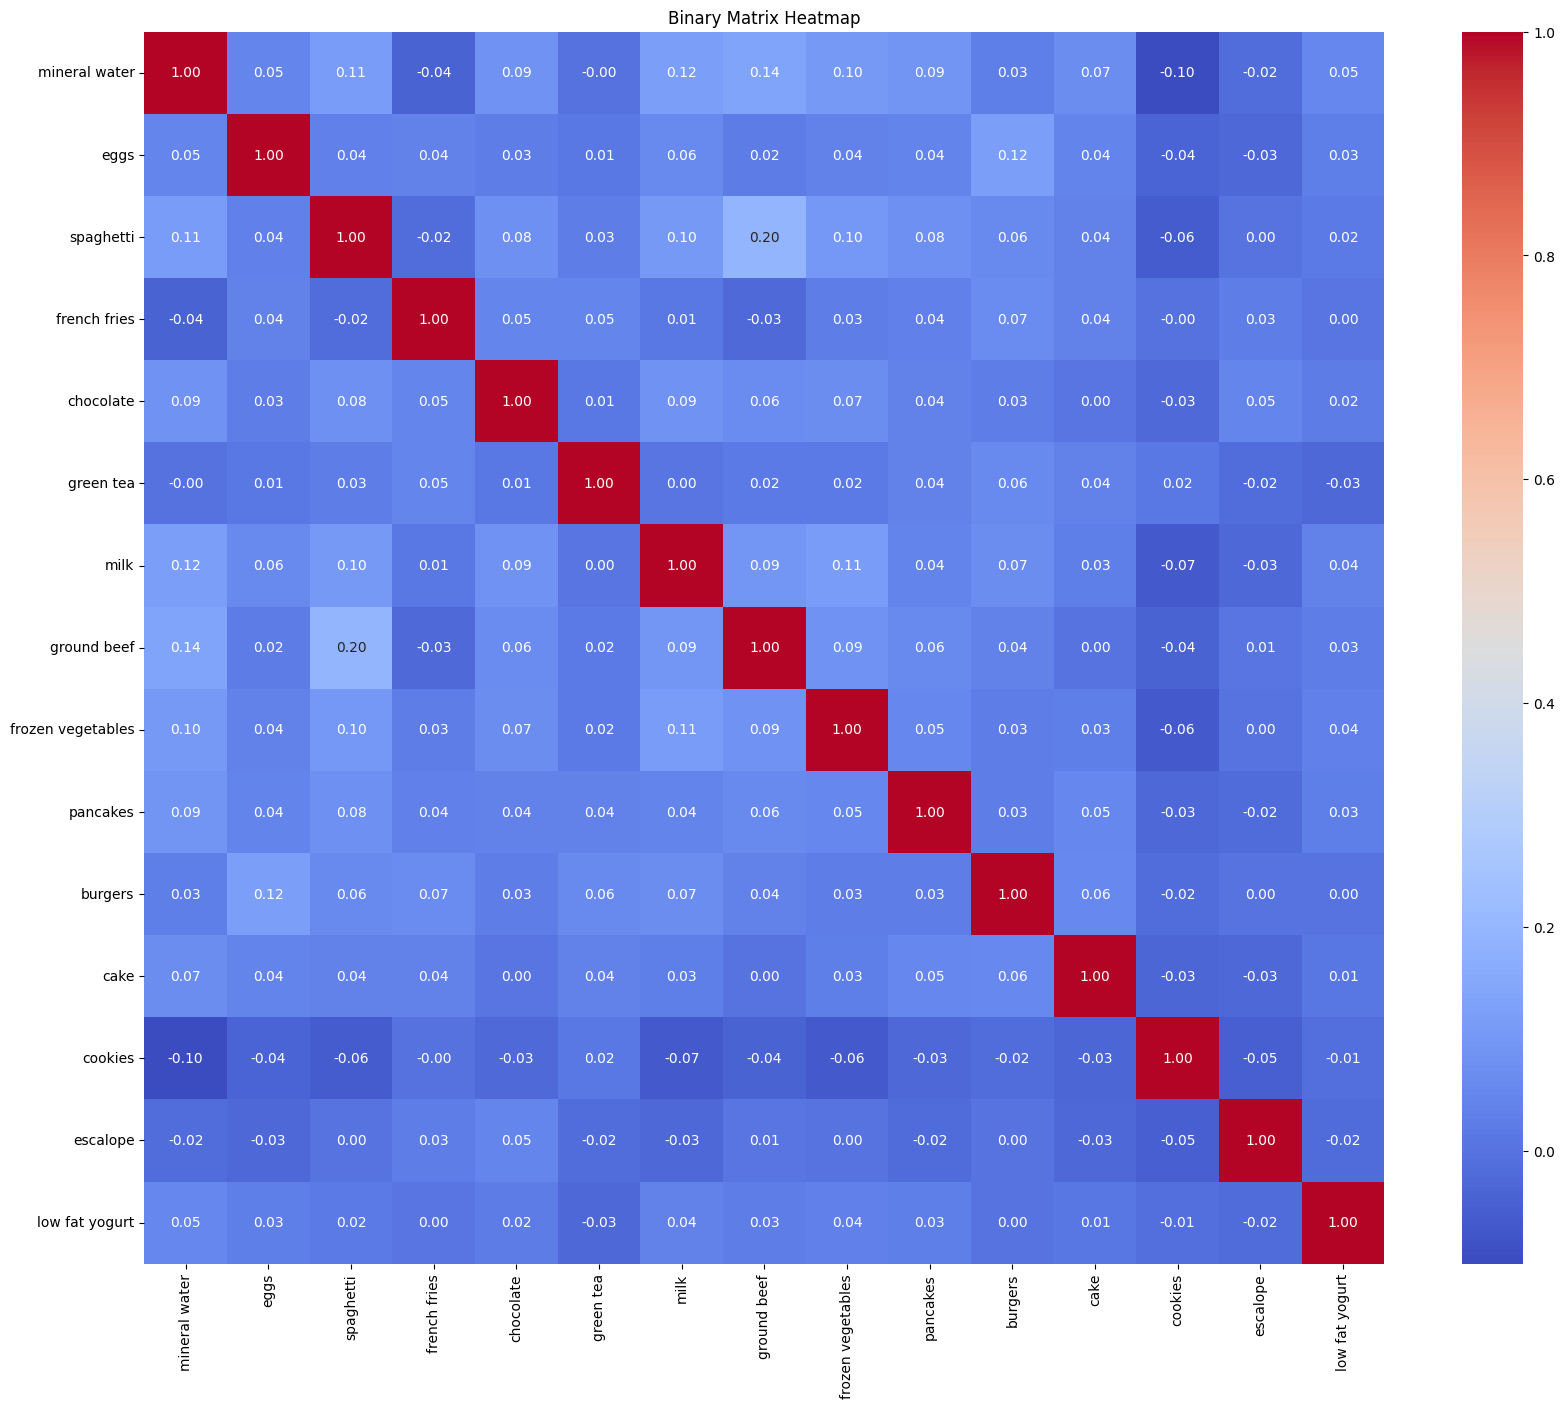

In [13]:
correlation_matrix = transaction_table[labels].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Binary Matrix Heatmap")
plt.show()

Generate Association Rules

In [14]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,0.003556,1.163629,0.320785
1,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,0.013127,1.224782,0.499351
2,(cake),(mineral water),0.081067,0.238267,0.027467,0.338816,1.422002,0.008151,1.152074,0.322947
3,(cereals),(mineral water),0.025733,0.238267,0.010267,0.398964,1.674442,0.004135,1.267367,0.413425
4,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,0.008504,1.228602,0.396790
...,...,...,...,...,...,...,...,...,...,...
58,"(milk, spaghetti)",(mineral water),0.035467,0.238267,0.015733,0.443609,1.861817,0.007283,1.369061,0.479911
59,"(mineral water, olive oil)",(spaghetti),0.027467,0.174133,0.010267,0.373786,2.146553,0.005484,1.318826,0.549222
60,"(olive oil, spaghetti)",(mineral water),0.022933,0.238267,0.010267,0.447674,1.878880,0.004802,1.379138,0.478747
61,"(pancakes, mineral water)",(spaghetti),0.033733,0.174133,0.011467,0.339921,1.952073,0.005593,1.251163,0.504751


We will not be using these metrics.

In [15]:

rules = rules.drop(labels = ["antecedent support", "consequent support", "leverage", "zhangs_metric"], axis = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Which occur the most in the transactions together

In [16]:
rules.sort_values(by="support", axis = 0, ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,conviction
29,(spaghetti),(mineral water),0.059733,0.343032,1.439698,1.159468
5,(chocolate),(mineral water),0.052667,0.321400,1.348907,1.122506
21,(milk),(mineral water),0.048000,0.370370,1.554436,1.209812
15,(ground beef),(mineral water),0.040933,0.416554,1.748266,1.305576
16,(ground beef),(spaghetti),0.039200,0.398915,2.290857,1.373959
11,(frozen vegetables),(mineral water),0.035733,0.374825,1.573133,1.218433
24,(pancakes),(mineral water),0.033733,0.354839,1.489250,1.180687
1,(burgers),(eggs),0.028800,0.330275,1.837585,1.224782
23,(olive oil),(mineral water),0.027467,0.417850,1.753707,1.308483
2,(cake),(mineral water),0.027467,0.338816,1.422002,1.152074


Items rules the most confidence. The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent.

In [17]:
rules.sort_values(by="confidence", axis = 0, ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,conviction
45,"(ground beef, eggs)",(mineral water),0.010133,0.506667,2.126469,1.544054
54,"(milk, ground beef)",(mineral water),0.011067,0.503030,2.111207,1.532756
39,"(ground beef, chocolate)",(mineral water),0.010933,0.473988,1.989319,1.448130
50,"(milk, frozen vegetables)",(mineral water),0.011067,0.468927,1.968075,1.434328
28,(soup),(mineral water),0.023067,0.456464,1.915771,1.401441
62,"(pancakes, spaghetti)",(mineral water),0.011467,0.455026,1.909736,1.397744
60,"(olive oil, spaghetti)",(mineral water),0.010267,0.447674,1.878880,1.379138
58,"(milk, spaghetti)",(mineral water),0.015733,0.443609,1.861817,1.369061
40,"(milk, chocolate)",(mineral water),0.014000,0.435685,1.828559,1.349836
56,"(ground beef, spaghetti)",(mineral water),0.017067,0.435374,1.827256,1.349094


The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.

In [18]:
rules.sort_values(by="lift", axis = 0, ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,conviction
14,(herb & pepper),(ground beef),0.016000,0.323450,3.291555,1.332841
55,"(ground beef, mineral water)",(spaghetti),0.017067,0.416938,2.394361,1.416431
51,"(mineral water, frozen vegetables)",(milk),0.011067,0.309701,2.389672,1.260904
22,(soup),(milk),0.015200,0.300792,2.320923,1.244836
16,(ground beef),(spaghetti),0.039200,0.398915,2.290857,1.373959
59,"(mineral water, olive oil)",(spaghetti),0.010267,0.373786,2.146553,1.318826
45,"(ground beef, eggs)",(mineral water),0.010133,0.506667,2.126469,1.544054
54,"(milk, ground beef)",(mineral water),0.011067,0.503030,2.111207,1.532756
34,(red wine),(spaghetti),0.010267,0.364929,2.095687,1.300432
33,(olive oil),(spaghetti),0.022933,0.348884,2.003547,1.268387


A high conviction value means that the consequent is highly depending on the antecedent.

In [19]:
rules.sort_values(by="conviction", axis = 0, ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,conviction
45,"(ground beef, eggs)",(mineral water),0.010133,0.506667,2.126469,1.544054
54,"(milk, ground beef)",(mineral water),0.011067,0.503030,2.111207,1.532756
39,"(ground beef, chocolate)",(mineral water),0.010933,0.473988,1.989319,1.448130
50,"(milk, frozen vegetables)",(mineral water),0.011067,0.468927,1.968075,1.434328
55,"(ground beef, mineral water)",(spaghetti),0.017067,0.416938,2.394361,1.416431
28,(soup),(mineral water),0.023067,0.456464,1.915771,1.401441
62,"(pancakes, spaghetti)",(mineral water),0.011467,0.455026,1.909736,1.397744
60,"(olive oil, spaghetti)",(mineral water),0.010267,0.447674,1.878880,1.379138
16,(ground beef),(spaghetti),0.039200,0.398915,2.290857,1.373959
58,"(milk, spaghetti)",(mineral water),0.015733,0.443609,1.861817,1.369061


In [20]:
rules[ (rules['confidence'] > 0.4) &
       (rules['lift'] > 1.8) &
       (rules['conviction'] > 1.2)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,conviction
28,(soup),(mineral water),0.023067,0.456464,1.915771,1.401441
39,"(ground beef, chocolate)",(mineral water),0.010933,0.473988,1.989319,1.448130
40,"(milk, chocolate)",(mineral water),0.014000,0.435685,1.828559,1.349836
45,"(ground beef, eggs)",(mineral water),0.010133,0.506667,2.126469,1.544054
50,"(milk, frozen vegetables)",(mineral water),0.011067,0.468927,1.968075,1.434328
52,"(frozen vegetables, spaghetti)",(mineral water),0.012000,0.430622,1.807311,1.337834
54,"(milk, ground beef)",(mineral water),0.011067,0.503030,2.111207,1.532756
55,"(ground beef, mineral water)",(spaghetti),0.017067,0.416938,2.394361,1.416431
56,"(ground beef, spaghetti)",(mineral water),0.017067,0.435374,1.827256,1.349094
58,"(milk, spaghetti)",(mineral water),0.015733,0.443609,1.861817,1.369061


Reducing the items by removing the most popular mineral water and spaghetti for a more clearer picture.

In [21]:
rules = rules[(rules['consequents'] != {'mineral water'}) & (rules['consequents'] != {'spaghetti'})]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
rules.sort_values(by = 'lift', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,conviction
14,(herb & pepper),(ground beef),0.016000,0.323450,3.291555,1.332841
51,"(mineral water, frozen vegetables)",(milk),0.011067,0.309701,2.389672,1.260904
22,(soup),(milk),0.015200,0.300792,2.320923,1.244836
42,"(milk, spaghetti)",(chocolate),0.010933,0.308271,1.881229,1.208758
1,(burgers),(eggs),0.028800,0.330275,1.837585,1.224782
8,(turkey),(eggs),0.019467,0.311301,1.732014,1.191037


These items are also frequenlty bought together so can be placed together.